<a href="https://colab.research.google.com/github/Vagarh/IUdigital/blob/main/CED_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos de análisis exploratorio de datos

* Análisis factorial: describe la variabilidad entre las variables correlacionadas en menos variables llamadas "factores". Se basa en la idea de factores "latentes" (que existen pero que no se han descubierto), que pueden describir múltiples variables. 
* Se usa para reducir el número de variables antes de construir modelos más complejos. 
* Más información: https://www.youtube.com/watch?v=Ollp2nSQCLY

* El análisis factorial analiza la varianza común a todas las variables, partiendo de una matriz de correlaciones --> simplifica la información
---
1. **Plantear el problema**: establecer los objetivos
- Las variables tienen que ser de intervalo o de razón (cuantitativas)
* El número de observaciones debería ser al menos 4 o 5 veces mayor que el número de variables

2. Elaborar matriz de correlación
3. Determinar el método de análisis factorial
* Componentes principales: considera la varianza total de los datos. Recomendada para determinar el número mínimo de factores que explican la varianza máxima. 
* Factores comunes: los factores se calculan a partir de la varianza común. Se le llama también factorización de eje principal
4. Determinar el número de factores
* a priori: lo determina el investigador
* valor propio: cuando el valor propio es mayor de 1
* gráfica de sedimentación: se visualiza las pendientes pronunciadas de factores de valores grandes
* Otros: porcentaje de varianza, confiabilidad de división de mitades y pruebas de significancia
5. Rotación de los factores: transforma la matriz factorial en una matriz más fácil de interpretar. Redistribuye la varianza entre los factores. 



In [ ]:
#dataset: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

'''
Contiene información de una encuesta de satisfacción a los clientes de una aerolínea. 
25975 observaciones y 25 columnas --> 14 de ellas representa la respuesta de los clientes
en una escala de 1 a 5 ()
'''

'\nContiene información de una encuesta de satisfacción a los clientes de una aerolínea. \n25975 observaciones y 25 columnas --> 14 de ellas representa la respuesta de los clientes\nen una escala de 1 a 5 ()\n'

In [ ]:
#primer paso: carga de datos
from google.colab import files
raw_data = files.upload()

In [ ]:
import pandas as pd

data = pd.read_csv('test.csv')
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


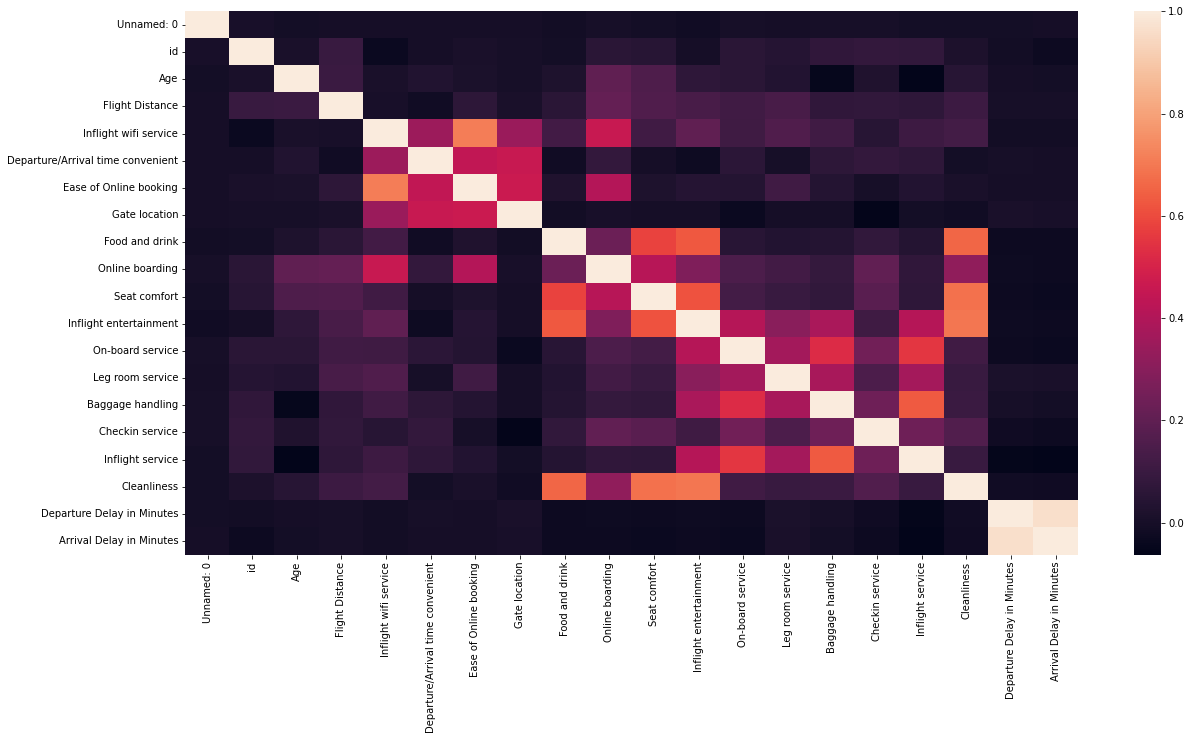

In [ ]:
#segundo paso: gráfico de correlación para ver si algunas variables aportan poco o están muy relacionadas con otras

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

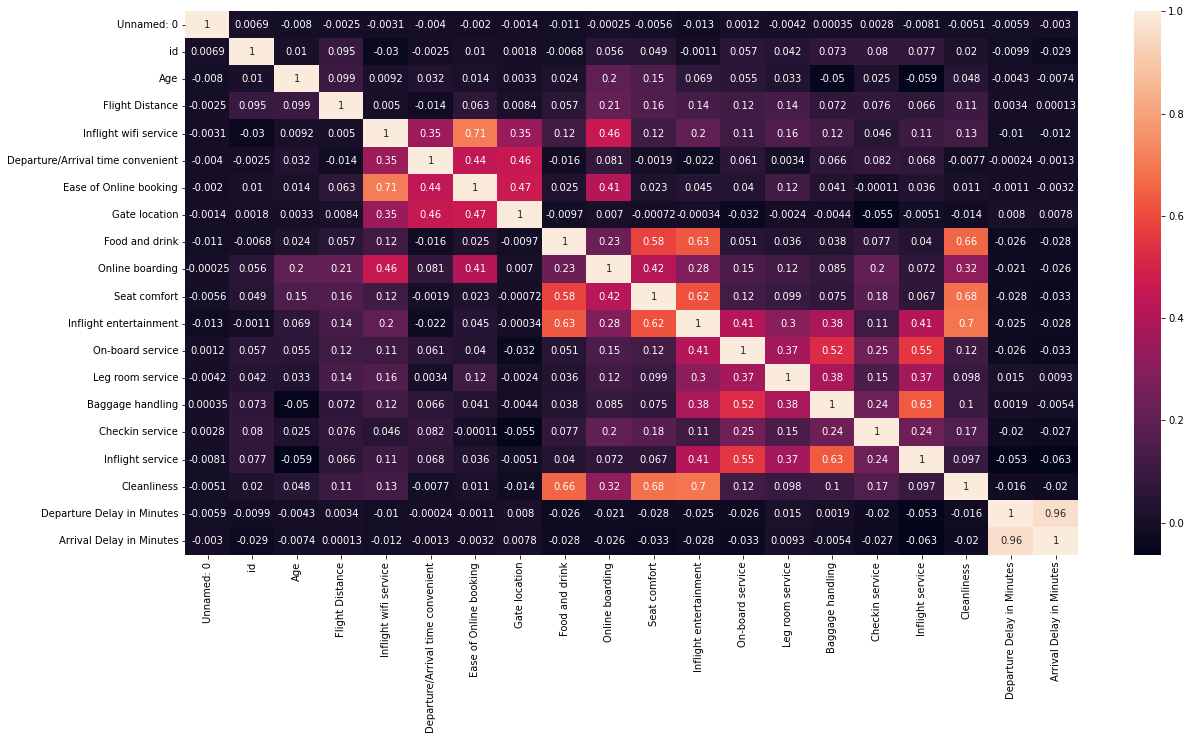

In [ ]:
#Con etiquetas
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

In [ ]:
corr_matrix

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.006946,-0.007964,-0.002470,-0.003085,-0.003962,-0.002011,-0.001360,-0.010858,-0.000254,-0.005602,-0.012927,0.001180,-0.004194,0.000349,0.002773,-0.008069,-0.005058,-0.005948,-0.002974
id,0.006946,1.000000,0.010211,0.095335,-0.030303,-0.002502,0.010389,0.001843,-0.006789,0.055767,0.049212,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.009884,-0.029090
Age,-0.007964,0.010211,1.000000,0.099409,0.009242,0.032449,0.013565,0.003308,0.023841,0.202058,0.154507,0.068998,0.054977,0.033299,-0.049863,0.025388,-0.059083,0.048418,-0.004334,-0.007400
Flight Distance,-0.002470,0.095335,0.099409,1.000000,0.005007,-0.014401,0.062989,0.008410,0.057322,0.214629,0.158957,0.137538,0.117880,0.136995,0.071549,0.075720,0.066355,0.105578,0.003446,0.000131
Inflight wifi service,-0.003085,-0.030303,0.009242,0.005007,1.000000,0.349137,0.710684,0.347790,0.122306,0.459366,0.116991,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.010078,-0.012277
Departure/Arrival time convenient,-0.003962,-0.002502,0.032449,-0.014401,0.349137,1.000000,0.440230,0.458439,-0.016006,0.080937,-0.001926,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.000238,-0.001345
Ease of Online booking,-0.002011,0.010389,0.013565,0.062989,0.710684,0.440230,1.000000,0.465514,0.025141,0.408003,0.022811,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.001062,-0.003161
Gate location,-0.001360,0.001843,0.003308,0.008410,0.347790,0.458439,0.465514,1.000000,-0.009694,0.006993,-0.000721,-0.000340,-0.031606,-0.002428,-0.004395,-0.054954,-0.005129,-0.014195,0.008039,0.007776
Food and drink,-0.010858,-0.006789,0.023841,0.057322,0.122306,-0.016006,0.025141,-0.009694,1.000000,0.229601,0.580970,0.627265,0.050688,0.035870,0.037617,0.076775,0.039992,0.659253,-0.025957,-0.028309
Online boarding,-0.000254,0.055767,0.202058,0.214629,0.459366,0.080937,0.408003,0.006993,0.229601,1.000000,0.415414,0.279391,0.149430,0.120354,0.084583,0.203309,0.071972,0.320912,-0.021037,-0.025875


Se puede observar que algunas variables están altamente relacionadas, especialmente las variables que vienen de las respuestas de la encuesta. El par de variables que está más correlacionada es "Departure delay in minutes" y "Arrival delay in minutes". --> si sale tarde el avión, llegará tarde. Como el coeficiente de correlación es tan alto (0.98) no tiene mucho sentido mantener ambas variables, así que la eliminamos. 





In [ ]:
#Eliminando una columna del dataframe
data.drop(["Arrival Delay in Minutes"], axis=1, inplace=True) #axis=1 --> columna; inplace=True --> no tengo que redefinir el dataframe
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,5,5,5,5,2,5,5,50,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,4,4,4,4,3,4,5,0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,4,1,1,1,1,3,1,4,0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,2,4,2,4,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,4,5,5,5,5,4,0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,4,3,2,5,4,5,4,0,satisfied


In [ ]:
'''
Nos vamos a enfocar en las 14 variables de la encuesta:
Inflight wifi service               
Departure/Arrival time convenient    
Ease of Online booking               
Gate location                        
Food and drink                       
Online boarding                      
Seat comfort                         
Inflight entertainment               
On-board service                     
Leg room service                     
Baggage handling                     
Checkin service                      
Inflight service                     
Cleanliness   
'''

survey_data = data[data.columns[8:22]]

In [ ]:
survey_data

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,2,3,4,3,4,1,2,2,2,2,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,3,3,3,1,4,3,4,4,3,2,4,4,5,4
25972,4,4,4,4,4,4,4,4,4,5,5,5,5,4
25973,2,5,1,5,2,1,2,2,4,3,4,5,4,2
25974,3,3,3,3,4,4,4,4,3,2,5,4,5,4


# Análisis factorial

In [ ]:
from factor_analyzer import FactorAnalyzer #Como no está, instalarlo
#Documentación: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html

In [ ]:
#Instalación de paquete
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Para determinar cuántos factores se necesitan se pueden verificar los valores propios, que son una medida de cuánto de la varianza de una variable es representada por un factor. Un valor propio de más de uno significa que el factor explica más varianza que una variable única. Un valor propio de 2.5 significa que un factor explicaría la varianza de 2.5 variables, etc. 

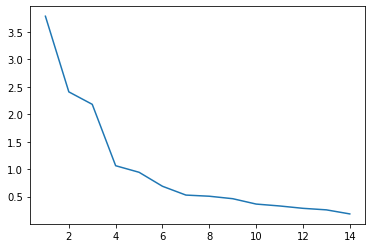

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()#Se crea un objeto de tipo factor analyzer
fa.fit(survey_data)

#valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,survey_data.shape[1]+1), ev)

In [ ]:
ev #valores propios

array([3.7862382 , 2.40860525, 2.18161657, 1.06344892, 0.94395049,
       0.6889982 , 0.52872324, 0.50770035, 0.46268646, 0.36501452,
       0.3305411 , 0.28741198, 0.2595226 , 0.18554213])

In [ ]:
v

array([ 3.39323366,  2.00233248,  1.7959353 ,  0.39771907,  0.21586603,
        0.07377475,  0.05715454,  0.04738411,  0.03202799, -0.01016289,
       -0.03527624, -0.20051804, -0.21776892, -0.26821622])

* Vamos a usar sólo 3 factores, dado que hay ua caída importante en el valor propio después del tercer factor (regla del codo). Estos factores tienen un valor propio de 3.7, 2.4 y 2.1. Esto significa que describen la varianaza de más o menos 8.1 variables. 

* Ahora, usamos la función FactorAnalyzer donde especificamos la cantidad de factores que queremos y el tipo de rotación. La idea de la rotación es rotar los factores con el fin de alcanzar una estructura más simple y fácil de interpretar. La más común es "varimax". 

In [ ]:
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(survey_data)
loads = fa.loadings_
print(loads)

[[ 0.16346953  0.12677268  0.76064247]
 [-0.04682986  0.05109289  0.51424604]
 [ 0.02897781  0.02692702  0.92125231]
 [-0.03872083 -0.0388429   0.51878056]
 [ 0.75593131  0.01197258 -0.00292856]
 [ 0.38827807  0.11325499  0.3666619 ]
 [ 0.79592338  0.07687229  0.02412952]
 [ 0.75010383  0.46654477  0.00912983]
 [ 0.08307233  0.70658801  0.02598115]
 [ 0.07298611  0.48987498  0.08255815]
 [ 0.02731511  0.76932914  0.02517718]
 [ 0.13028349  0.28940259  0.02061589]
 [ 0.02358038  0.79858607  0.01505734]
 [ 0.85664625  0.09167543 -0.00824982]]


In [ ]:
for idx, column in enumerate(survey_data.columns):
  print(idx+1,column)

1 Inflight wifi service
2 Departure/Arrival time convenient
3 Ease of Online booking
4 Gate location
5 Food and drink
6 Online boarding
7 Seat comfort
8 Inflight entertainment
9 On-board service
10 Leg room service
11 Baggage handling
12 Checkin service
13 Inflight service
14 Cleanliness


* Esta función nos retorna una matriz de N(cantida de variables) x M(cantidad de factores). Entre más alto sea el factor de carga (valor en la matriz), más importante es dicha variable para ese factor. Se define un límite (threshold) para determinar si una variable pertenece o no a un factor específico (en este caso, 0.5). Por ejemplo, se puede ver que el primer factor contiene a las variables 5,7,8 y 14 (cargas de 0.75, 0.79, 0.75, 0.72 y 0.85). 
* Se pueden definir los tres factores como sigue: 

* Comodidad: "foord and drink", "seat comfort", "inflight entertainment", "cleanliness"
* Servicio: "Onboard service", "baggage handling", "inflight service"
* Conveniencia: "in flight wifi", "departure/arrival time convenience", "online booking", "gate location". 



---


* Para verificar  los factores están efectivamente bien distribuidos (si forman un factor coherente) se puede usar el alfa de Cronbach

* **Más información**:
* https://towardsdatascience.com/cronbachs-alpha-theory-and-application-in-python-d2915dd63586
* https://www.statology.org/cronbachs-alpha-in-python/
* https://www.datacamp.com/tutorial/introduction-factor-analysis

In [ ]:
#nueva representación para los datos bajo los tres factores.
new_variables = fa.fit_transform(survey_data)
new_variables

array([[ 0.47654594,  1.31264024,  0.46285065],
       [ 1.11432711,  0.17137323, -0.47109495],
       [-0.97691951, -0.82811605, -0.53126498],
       ...,
       [-1.29985586,  0.34988844, -0.64996009],
       [ 0.43397697,  0.61021889,  0.12353248],
       [-1.02148009, -2.35772109, -0.17543356]])

# Agrupamiento K-means

* El método K-means es un método no supervisado de aprendizaje de máquina que se usa para identificar clusters en un dataset. Existen muchos tipos de enfoques para resolver este problema, siendo k-means uno de los más usados y más fáciles de implementar. 

* Este tipo de técnicas son muy usadas en aprendizaje no supervisado (Agrupación o clustering).
* Lo que buscan estas técnicas es agrupar a datos similares y separar a datos diferentes.
* El algoritmo k-means busca formar grupos de alta similitud. 
* Esta similitud está dada por la distancia entre los datos. A menor distancia entre los puntos, mayor similitud. 
* Algunas ventajas: facilidad de implementación y modificación. 
* Desventajas: no es recomendable para datasets con representación gráfica ovalada o circular

**Algoritmo**

1. Se define k (número de clústers)
2. Se asignan aleatoriamente los centroides
3. Se asigna cada punto al centroide más cercano (distancia euclidiana)
4. Se evalúa la calidad de los centroides
5. Se recalculan centroides
6. Repite 3-4 o terminar

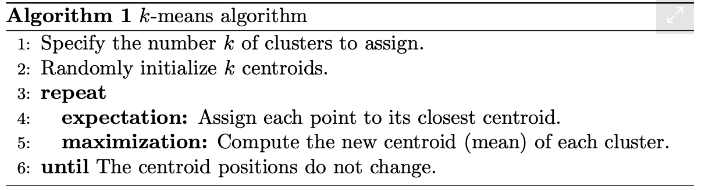

* La calidad de la asignación de los clusters se determina calculando la suma de cuadrados de estimación (SSE - sum of the squared error) después de que los centroides convergen o igualan la asignación de clusters anterior. El SSE se define como la suma del cuadrado de las distancias euclidianas entre cada punto y su centroide más cercano. Ya que este valor es un error, el objetivo del algoritmo es minimizarlo. 
* Este proceso es no determinista, es decir, la asignación de clusters puede variar si se corre el algoritmo dos veces sobre el mismo dataset

Para determinar el número de clústers el método más común es el método del codo

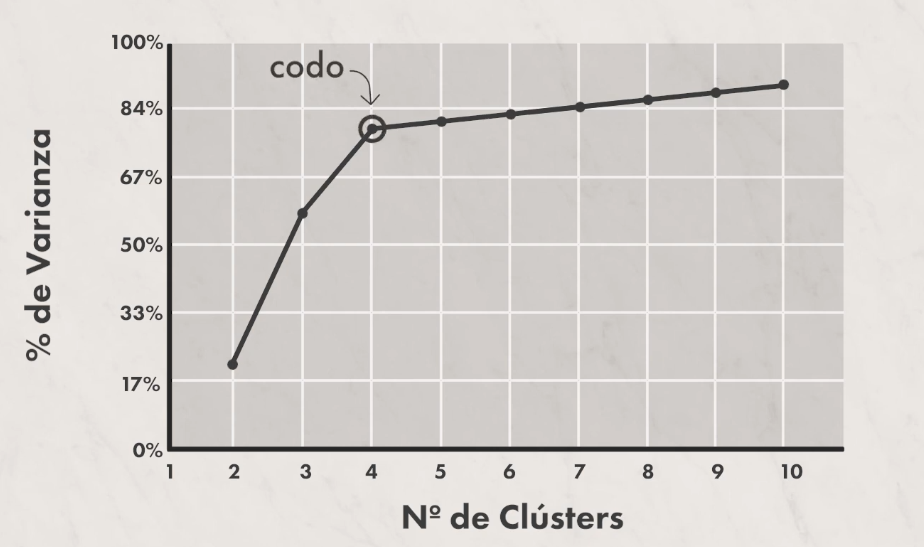

Evaluación del modelo: función objetivo

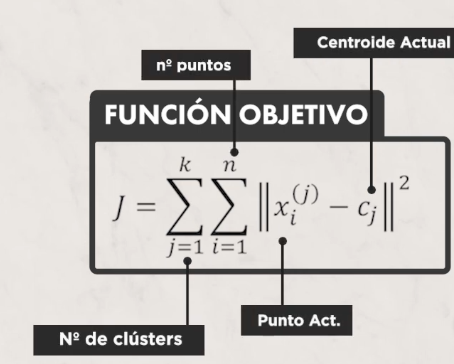

# Ejemplo 1

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#librerías
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

* La función make_blobs genera una tupla con dos valores: un ndarray de dos dimensiones con valores x,y y un ndarray de una dimensión con los labels de cada uno de los puntos
* El random state sirve como semilla para asegurar la reproducibilidad

In [ ]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

* Los datasets usualmente contienen características numéricas que se han medido en diferentes unidades, por ejemplo altura (en centímetros), peso en kilos, etc. Este algoritmo tendrá en cuenta más los valores de la altura ya que son mucho mayores que los del peso y porque pueden variar más
* Los algoritmos de aprendizaje de máquina necesitan considerar todas las características sin sesgos --> se debe transformar todo a la misma escala.
* Este proceso se conoce como featuring-scaling --> es un paso muy importante en el preprocesamiento para la mayoría de algoritmos que se basan en cálculos de distancias debido a que tienen un impacto muy positivo en el rendimiento. 
* Existen muchas técnicas para el featuring scaling: (revisar) https://scikit-learn.org/stable/modules/preprocessing.html
* En este ejemplo, usaremos el StandarScaler

In [ ]:
scaler = StandardScaler() #objeto de tipo StandardScaler de la librería sklearn.preprocessing
scaled_features = scaler.fit_transform(features)
scaled_features[:5] #media= 0, std=1

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

* Para este ejemplo: el método kmeans recibe muchos parámetros, revisar documentación --> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

* **init**: controla la técnica de inicialización. La versión por defecto se define como random pero existen otras como "k-means++" que acelera el proceso de convergencia.
* **n_clusters**: define la cantidad de clusters a definir --> es el parámetro más importante para el algoritmo
* **n_init**: define el número de inicializaciones a ejecutar. Por defecto es 10, es importante porque determina la cantidad de veces a correr. 
* **max_iter**: define el número máximo de iteraciones para cada inicialización

In [ ]:
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)

In [ ]:
#vamos a aplicar el objeto kmeans y lo vamos a evaluar con nuestros datos
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
#accediendo a estadísticos de la corrida con el menor SSE
print("inercia ", kmeans.inertia_)
print("centros de cluster ", kmeans.cluster_centers_) #centroides
print("número de iteraciones ", kmeans.n_iter_) #número de iteraciones para converger


inercia  74.57960106819854
centros de cluster  [[-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]
 [ 1.19539276  0.13158148]]
número de iteraciones  2


In [ ]:
#la asignación de clusters se guarda en el atributo labels_
kmeans.labels_[:5]

array([2, 0, 1, 1, 1], dtype=int32)

In [ ]:
true_labels[:5] #diferencia respecto a los definidos inicialmente

array([1, 0, 2, 2, 2])

* Estas diferencias son normales debido al método de inicialización --> el cluster 0 de la primera corrida, se pudo etiquetar como cluster 1 y vice versa.

# **Escogiendo el número de clusters**

In [ ]:
kmeans_kwargs = {"init":"random", "n_init":10, "max_iter":300, "random_state":42} #diccionario con parámetros
sse = [] #lista para guardar el sse calculado
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

* El punto del codo: punto intermedio entre el número de clusters y el error

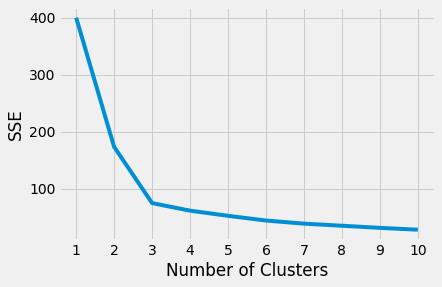

In [ ]:
#graficando
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
import pandas as pd

data = pd.DataFrame(scaled_features, columns = ["x","y"])
data["labels"] = kmeans.labels_
data

,x,y,labels
0,2.130821,0.256044,3
1,-1.526985,1.410367,6
2,-1.001302,-1.565832,1
3,-1.742569,-1.768325,5
4,-1.299245,-0.872534,0
...,...,...,...
195,-0.834469,-0.624183,0
196,0.799253,1.153455,8
197,0.640774,1.388750,8
198,0.923954,0.500173,4


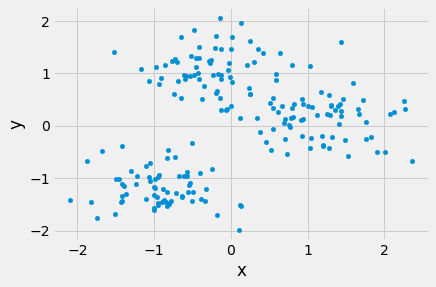

In [ ]:
data.plot(x="x", y="y", kind="scatter")

# Ejemplo 2

In [ ]:
import pandas as pd

data = pd.read_csv('dataset_clustering.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Convirtiendo variable categórica a numérica manualmente con función lambda
data["Gender"] = data["Gender"].map(lambda x: 1 if x=="Female" else 0)
data = data.drop("CustomerID", axis = 1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
#Importamos clase Kmeans
import numpy as np
from sklearn.cluster import KMeans

#Extraemos todos los valores del DataFrame
data_values = data.values

#Creamos objeto de tipo Kmeans y definimos el número de clusters (n_clusters)
kmeans_model = KMeans(n_clusters=5, random_state=0)

#Entrenamos el modelo con nuestros datos
kmeans_model.fit(data_values)

'''
Una vez entrenado, podemos observar las etiquetas (con base en el número de clusters)
que se le asignaron a cada una de las filas con el atributo "labels_"
'''
print(kmeans_model.labels_)
#Aquí creamos una nueva columna en el DataFrame con las etiquetas para cada una de las filas
data["labels"] = kmeans_model.labels_
'''
[0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]
'''

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


'\n[0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2\n 0 2 0 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2\n 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2\n 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3\n 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1\n 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]\n'

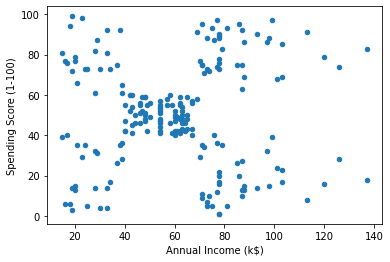

In [ ]:
#Graficando variables
data.plot(x="Annual Income (k$)", y="Spending Score (1-100)", kind="scatter")

In [ ]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,0,19,15,39,0
1,0,21,15,81,4
2,1,20,16,6,0
3,1,23,16,77,4
4,1,31,17,40,0


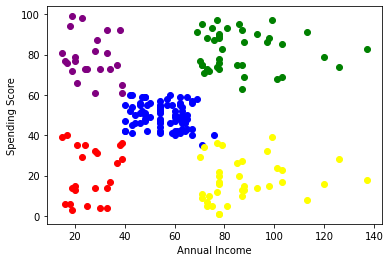

In [ ]:
#Importando librearías para graficar
import numpy as np
import matplotlib.pyplot as plt

#Datos por cada etiqueta
data_label0 = data[data["labels"] == 0]
data_label1 = data[data["labels"] == 1]
data_label2 = data[data["labels"] == 2]
data_label3 = data[data["labels"] == 3]
data_label4 = data[data["labels"] == 4]

#Columnas a comparar/Graficar
#0: gender, 1: age, 2: annual income, 3: spending score
#Estas las pueden cambiar para ver cómo varían los gráficos
col1 = 2
col2 = 3

#Diccionario para extraer las etiquetas del gráfico
labels = {0:"Gender", 1:"Age", 2:"Annual Income", 3:"Spending Score"}

#Creación de gráficos
plt.scatter(data_label0.iloc[:,col1], data_label0.iloc[:,col2], color = 'red')
plt.scatter(data_label1.iloc[:,col1], data_label1.iloc[:,col2], color = 'green')
plt.scatter(data_label2.iloc[:,col1], data_label2.iloc[:,col2], color = 'blue')
plt.scatter(data_label3.iloc[:,col1], data_label3.iloc[:,col2], color = 'yellow')
plt.scatter(data_label4.iloc[:,col1], data_label4.iloc[:,col2], color = 'purple')

#Asignando etiquetas a gráficos
plt.xlabel(labels[col1])
plt.ylabel(labels[col2])
plt.show()

In [ ]:
#Determinar número de clusters --> regla del codo (distorsión e inercia)
#Más información:https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/ 

In [ ]:
#Calculando el número de clusters con el método del codo
#Normalizando los datos

data_norm = (data - data.min())/(data.max()-data.min())

#data_norm.drop(labels=["Gender","labels"], axis=1, inplace=True)
data_norm

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,0.0,0.019231,0.000000,0.387755,0.00
1,0.0,0.057692,0.000000,0.816327,1.00
2,1.0,0.038462,0.008197,0.051020,0.00
3,1.0,0.096154,0.008197,0.775510,1.00
4,1.0,0.250000,0.016393,0.397959,0.00
...,...,...,...,...,...
195,1.0,0.326923,0.860656,0.795918,0.25
196,1.0,0.519231,0.909836,0.275510,0.75
197,0.0,0.269231,0.909836,0.744898,0.25
198,0.0,0.269231,1.000000,0.173469,0.75


In [ ]:
data_norm.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,0.400962,0.373443,0.502041,0.496250
std,0.497633,0.268635,0.215285,0.263505,0.285184
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.206731,0.217213,0.344388,0.250000
50%,1.000000,0.346154,0.381148,0.500000,0.500000
75%,1.000000,0.596154,0.516393,0.734694,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
wcss = [] #within cluster sum squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_) #Este atributo me guarda el valor de wcss de cada modelo

Text(0, 0.5, 'wcss')

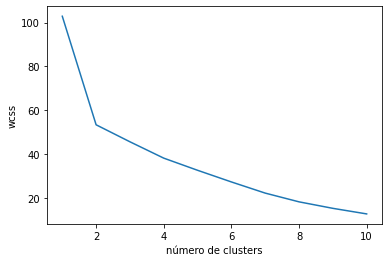

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel('número de clusters')
plt.ylabel('wcss')


In [ ]:
'''
Se puede observar que el wcss decrece a medida que el número de clusters aumenta. 
Lo que buscamos, es determinar cuándo deja de crecer abruptamente, allí encontraremos
nuestro k (número de clústers) --> en este caso, podría ser 4. 
'''